Loaded Variance with shape: (512, 512, 275)


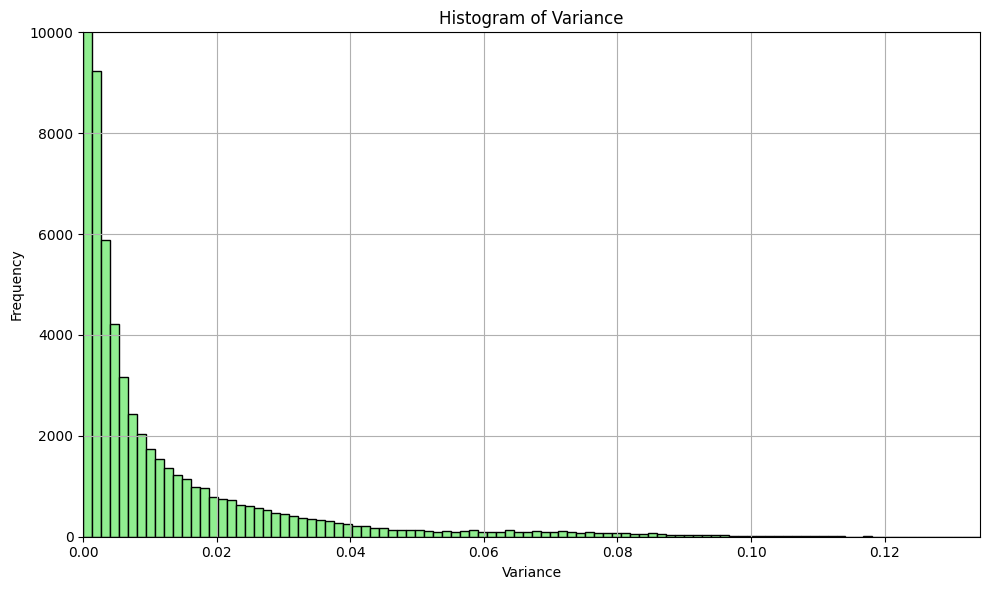

Loaded Shannon Entropy with shape: (512, 512, 275)


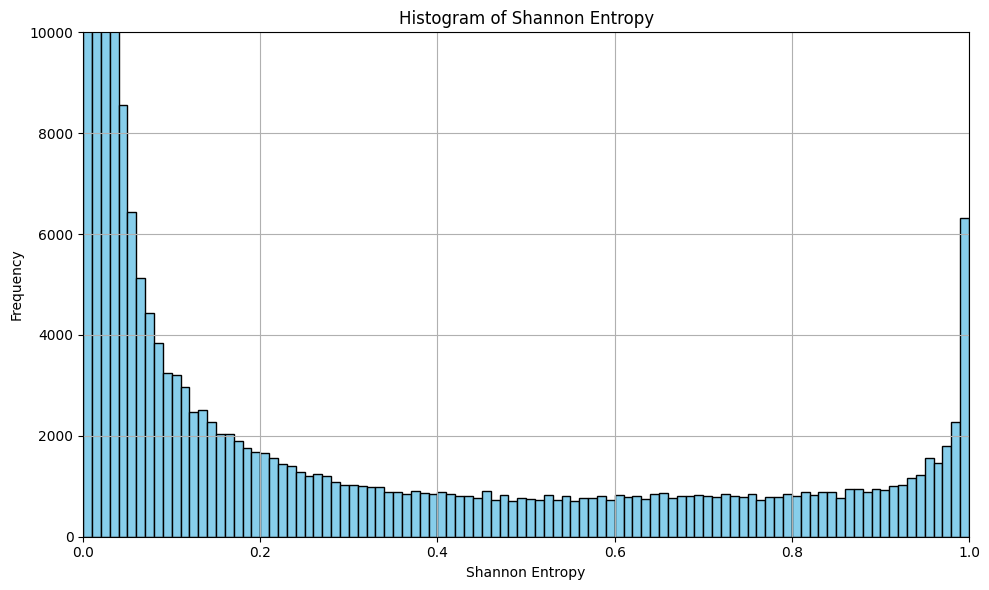

Loaded Expected Entropy with shape: (512, 512, 275)


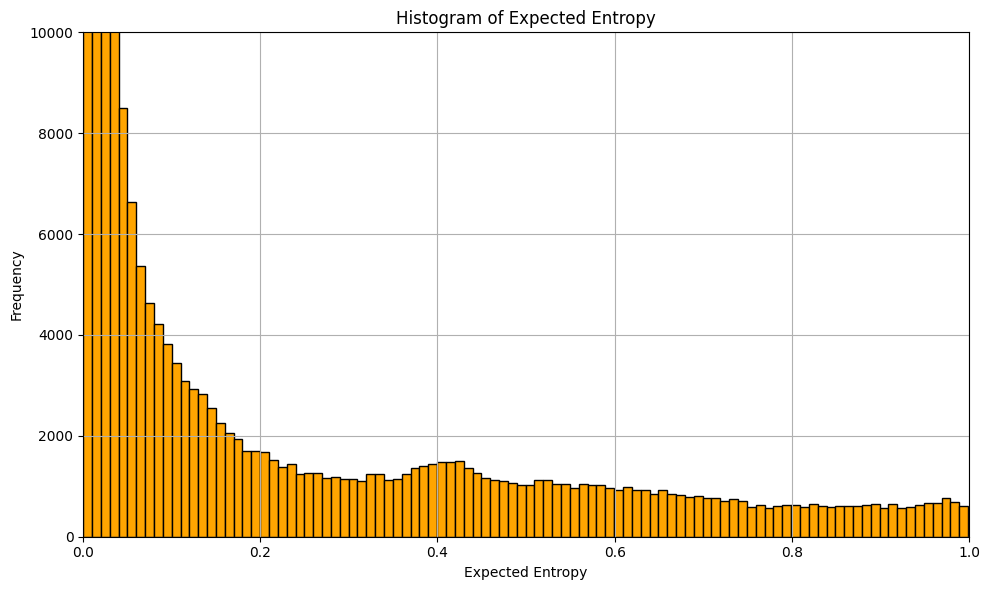

Loaded Mutual Information with shape: (512, 512, 275)


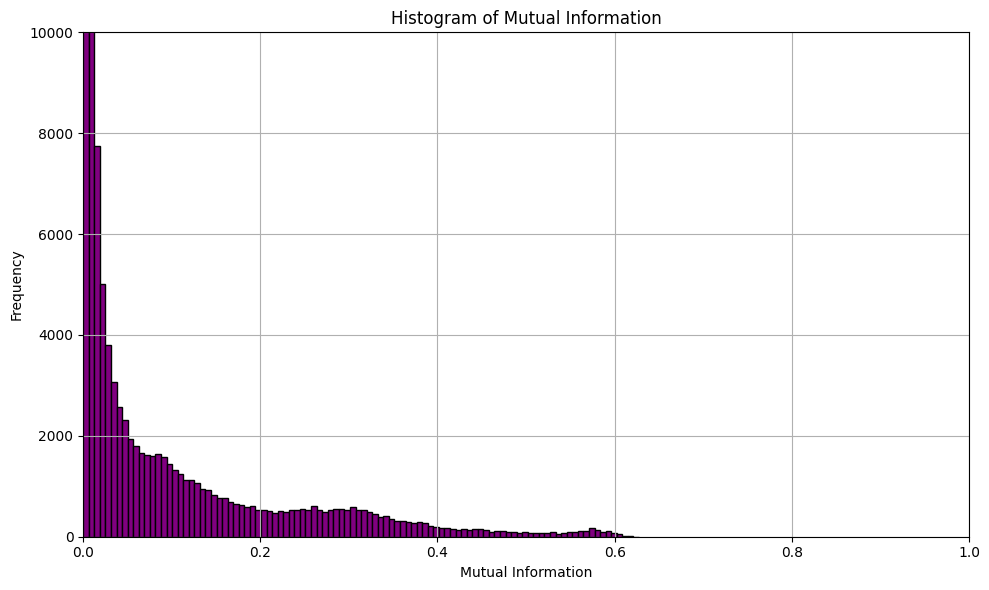

In [2]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Paths
paths = {
    "Shannon Entropy": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/inference/case_0002/case_0002_shannon_entropy.nii.gz',
    "Variance": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/inference/case_0002/case_0002_var.nii.gz',
    "Mutual Information": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/inference/case_0002/case_0002_mutual_info.nii.gz',
    "Expected Entropy": '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/inference/case_0002/case_0002_expected_entropy.nii.gz'
}

def load_nii_data(path, label):
    if not os.path.isfile(path):
        raise FileNotFoundError(f"{label} NIfTI file not found at: {path}")
    data = nib.load(path).get_fdata()
    print(f"Loaded {label} with shape: {data.shape}")
    data = data.flatten()
    return data[np.isfinite(data)]

def plot_histogram(data, label, color='skyblue', bins=100, xlim=(0, 1), ylim=(0, 10000)):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=bins, color=color, edgecolor='black')
    plt.xlabel(label)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {label}')
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Load and plot individual histograms
variance = load_nii_data(paths["Variance"], "Variance")
plot_histogram(variance, "Variance", color='lightgreen', xlim=(0, np.max(variance)), ylim=(0, 10000))

shannon = load_nii_data(paths["Shannon Entropy"], "Shannon Entropy")
plot_histogram(shannon, "Shannon Entropy", color='skyblue')

expected_entropy = load_nii_data(paths["Expected Entropy"], "Expected Entropy")
plot_histogram(expected_entropy, "Expected Entropy", color='orange')

mutual_info = load_nii_data(paths["Mutual Information"], "Mutual Information")
plot_histogram(mutual_info, "Mutual Information", color='purple')





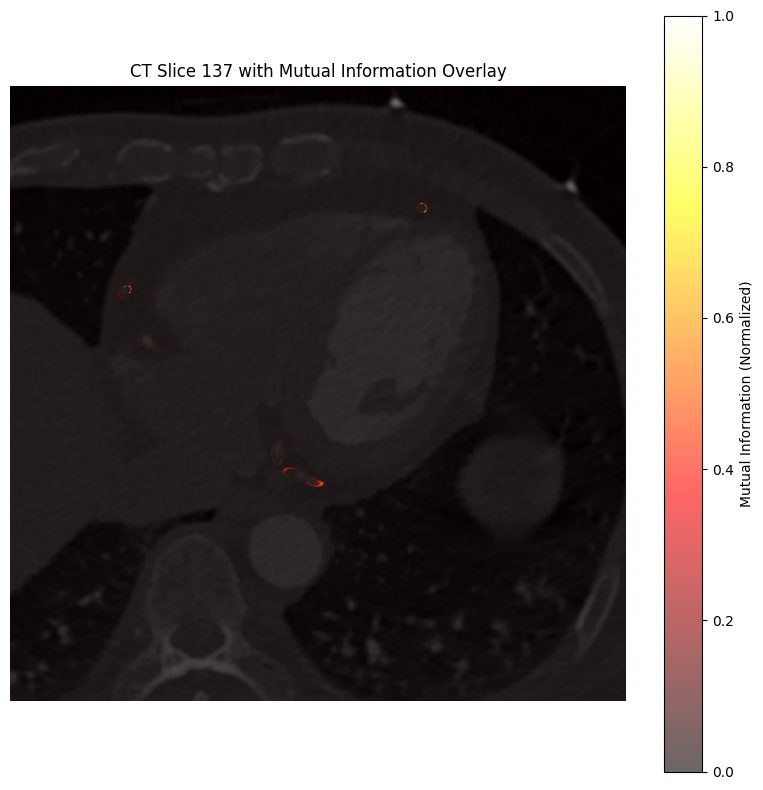

In [3]:
# Paths to NIfTI files
ct_path = '/data/dsstu/nnUNet_raw/Dataset003_ImageCAS_split/imagesTs/case_0002_0000.nii.gz'
mi_path = '/mnt/processing/emil/nnUNet_results/Dataset003_ImageCAS_split/nnUNetTrainerDropout__p02_s2__3d_fullres/inference/case_0002/case_0002_mutual_info.nii.gz'

# Load the data
ct = nib.load(ct_path).get_fdata()
mi = nib.load(mi_path).get_fdata()

# Choose a slice (axial slice index)
z = ct.shape[2] // 2
ct_slice = ct[:, :, z]
mi_slice = mi[:, :, z]

# Normalize CT and MI for display
ct_norm = (ct_slice - np.min(ct_slice)) / (np.max(ct_slice) - np.min(ct_slice))
mi_norm = (mi_slice - np.min(mi_slice)) / (np.max(mi_slice) - np.min(mi_slice))

# Plot overlay
plt.figure(figsize=(8, 8))
plt.imshow(ct_norm.T, cmap='gray', origin='lower')
plt.imshow(mi_norm.T, cmap='hot', alpha=0.6, origin='lower')  # Overlay MI with transparency
plt.title(f'CT Slice {z} with Mutual Information Overlay')
plt.axis('off')
plt.colorbar(label='Mutual Information (Normalized)')
plt.tight_layout()
plt.show()
